This code will create an image for each character in the font image

In [1]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

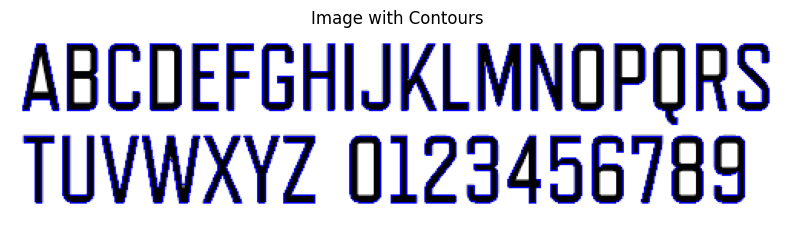

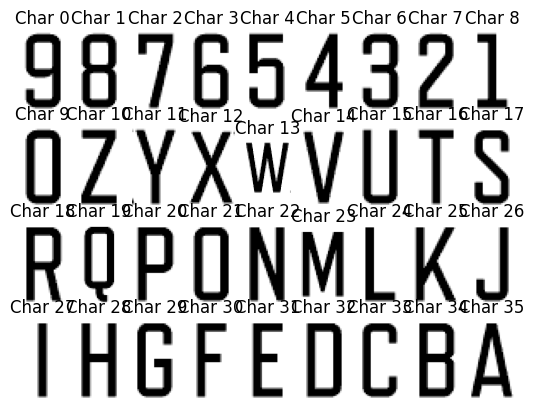

In [2]:
image_path = '../images/font_image/Refrigerator_Deluxe.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (255,0,0), 1)
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.imshow(contour_image_rgb)
plt.title('Image with Contours')
plt.axis('off')
plt.show()

padding=2

for idx, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    x_padded = max(x - padding, 0)
    y_padded = max(y - padding, 0)
    w_padded = min(w + 2 * padding, image.shape[1] - x_padded)
    h_padded = min(h + 2 * padding, image.shape[0] - y_padded)
    char_image = image[y_padded:y_padded+h_padded, x_padded:x_padded+w_padded]

    plt.subplot(4, 9, idx + 1)  # Adjust the grid size (5, 8) based on the number of characters
    plt.imshow(char_image, cmap='gray')
    plt.title(f'Char {idx}')
    plt.axis('off')
    char_image_path=f'RD_char_{idx}.png'
    cv2.imwrite(char_image_path, char_image)
